In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [45]:
df = pd.read_csv('scores.csv')

In [46]:
df

,id,s1,s1_interaction,s2,s2_interaction,s3,s3_interaction,s4,s4_interaction,s5,...,s6,s6_interaction,s6.1,s6_interaction.1,s7,s7_interaction,s8,s8_interaction,s9,s9_interaction
0,1,2,0,2,1,2,1,2,1,2,...,2,0,2,0,2,0,2,0,2,0
1,2,2,0,2,1,2,1,2,1,2,...,2,0,2,0,2,0,2,0,2,0
2,3,2,0,2,1,2,1,2,1,2,...,2,0,2,0,2,0,2,0,2,0
3,4,2,0,2,1,2,1,2,1,2,...,2,0,2,0,2,0,2,0,2,0
4,5,2,0,2,1,2,1,2,1,2,...,2,0,2,0,2,0,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4,0,4,1,4,1,4,1,4,...,4,0,4,0,4,0,4,0,4,0
96,97,4,0,4,1,4,1,4,1,4,...,4,0,4,0,4,0,4,0,4,0
97,98,4,0,4,1,4,1,4,1,4,...,4,0,4,0,4,0,4,0,4,0
98,99,4,0,4,1,4,1,4,1,4,...,4,0,4,0,4,0,4,0,4,0


In [47]:
all_scores = df[['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9']].values.flatten()

In [48]:
all_scores

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

(array([0. , 0.5, 0. , 0.5, 0. ]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <BarContainer object of 5 artists>)

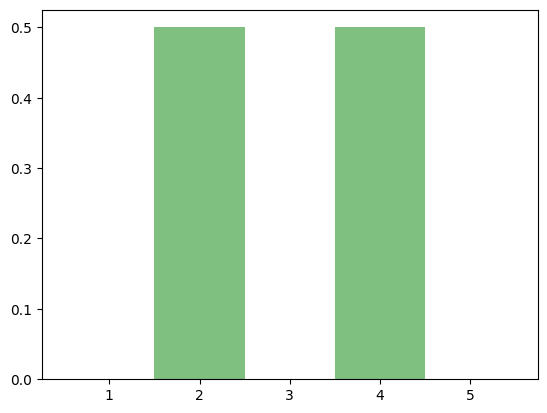

In [49]:
plt.hist(all_scores, bins=np.arange(1, 7) - 0.5, density=True, alpha=0.5, color='g')

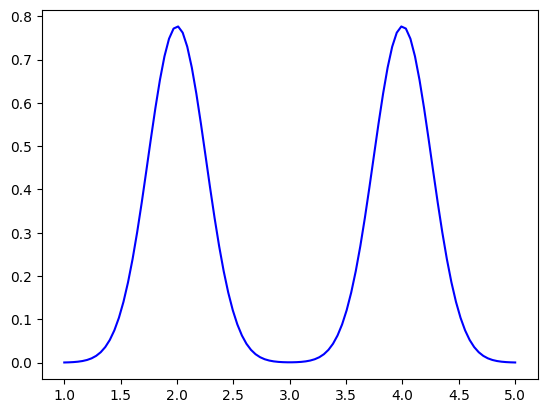

In [50]:
# Оценка плотности
kde = gaussian_kde(all_scores)
x = np.linspace(1, 5, 100)
plt.plot(x, kde(x), color='blue')


In [51]:
peak = x[np.argmax(kde(x))]  # Найти x, соответствующее пику

In [52]:
peak

3.98989898989899

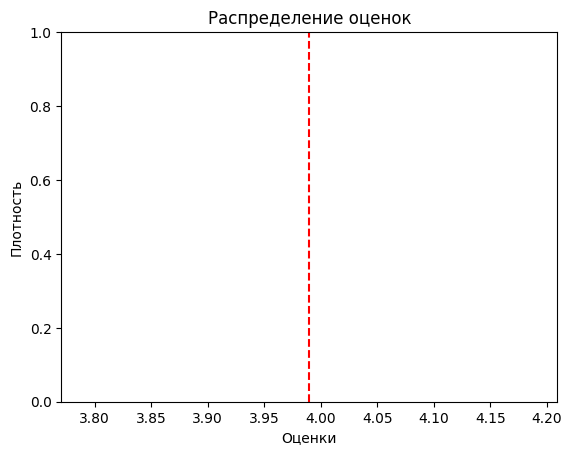

In [53]:

plt.axvline(peak, color='red', linestyle='--')
plt.title('Распределение оценок')
plt.xlabel('Оценки')
plt.ylabel('Плотность')
plt.show()

In [54]:
group_comfortable = all_scores[all_scores >= peak]
group_uncomfortable = all_scores[all_scores < peak]

In [55]:
score_columns = df.columns[df.columns.str.match(r'^s[1-9][0-9]?$')]

In [56]:
for col in score_columns:
    df[f'{col}_comfortable'] = df[col].apply(lambda x: 1 if x in group_comfortable else 0)
    df[f'{col}_uncomfortable'] = df[col].apply(lambda x: 1 if x in group_uncomfortable else 0)

In [57]:
df

,id,s1,s1_interaction,s2,s2_interaction,s3,s3_interaction,s4,s4_interaction,s5,...,s5_comfortable,s5_uncomfortable,s6_comfortable,s6_uncomfortable,s7_comfortable,s7_uncomfortable,s8_comfortable,s8_uncomfortable,s9_comfortable,s9_uncomfortable
0,1,2,0,2,1,2,1,2,1,2,...,0,1,0,1,0,1,0,1,0,1
1,2,2,0,2,1,2,1,2,1,2,...,0,1,0,1,0,1,0,1,0,1
2,3,2,0,2,1,2,1,2,1,2,...,0,1,0,1,0,1,0,1,0,1
3,4,2,0,2,1,2,1,2,1,2,...,0,1,0,1,0,1,0,1,0,1
4,5,2,0,2,1,2,1,2,1,2,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4,0,4,1,4,1,4,1,4,...,1,0,1,0,1,0,1,0,1,0
96,97,4,0,4,1,4,1,4,1,4,...,1,0,1,0,1,0,1,0,1,0
97,98,4,0,4,1,4,1,4,1,4,...,1,0,1,0,1,0,1,0,1,0
98,99,4,0,4,1,4,1,4,1,4,...,1,0,1,0,1,0,1,0,1,0


In [58]:
def formula(df):
    results = {'variable': [], 'value': []}

    for index, row in df.iterrows():
        for i in range(1, 10):
            s = f's{i}'
            s_interaction = f's{i}_interaction'
            s_comfortable = f's{i}_comfortable'

            if row[s_comfortable] == 0:
                n_i = (row[s] - 6) * (10 ** row[s_interaction])
            else:  # s_comfortable = 1
                n_i = row[s] * (10 ** row[s_interaction])

            results['variable'].append(s)
            results['value'].append(n_i)

    result_df = pd.DataFrame(results)
    summed_results = result_df.groupby('variable')['value'].sum().reset_index()

    return summed_results

In [59]:
result_df = formula(df)

In [60]:
result_df

,variable,value
0,s1,0
1,s2,0
2,s3,0
3,s4,0
4,s5,0
5,s6,0
6,s7,0
7,s8,0
8,s9,0


In [61]:
result_df.to_csv('final_scale.csv', index=False)